# Machine Learning Project for Insurance Cost Prediction

In [2]:
#!pip install numpy

     ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.9 MB 2.0 MB/s eta 0:00:08
     ---------------------------------------- 0.1/14.9 MB 1.3 MB/s eta 0:00:12
      --------------------------------------- 0.2/14.9 MB 1.7 MB/s eta 0:00:09
      --------------------------------------- 0.3/14.9 MB 1.9 MB/s eta 0:00:08
     - -------------------------------------- 0.4/14.9 MB 2.2 MB/s eta 0:00:07
     - -------------------------------------- 0.4/14.9 MB 2.2 MB/s eta 0:00:07
     - -------------------------------------- 0.6/14.9 MB 1.8 MB/s eta 0:00:09
     - -------------------------------------- 0.6/14.9 MB 1.9 MB/s eta 0:00:08
     - -------------------------------------- 0.6/14.9 MB 1.9 MB/s eta 0:00:08
     - -------------------------------------- 0.6/14.9 MB 1.9 MB/s eta 0:00:08
     -- ------------------------------------- 0.9/14.9 MB 1.8 MB/s eta 0:00:08
     -- ------------------------------------- 0.9/14.9 MB 1

In [3]:
#!pip install pandas

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------------- 0.0/10.7 MB 991.0 kB/s eta 0:00:11
     ---------------------------------------- 0.1/10.7 MB 1.1 MB/s eta 0:00:11
     ---------------------------------------- 0.1/10.7 MB 1.0 MB/s eta 0:00:11
      --------------------------------------- 0.3/10.7 MB 1.6 MB/s eta 0:00:07
     - -------------------------------------- 0.4/10.7 MB 1.6 MB/s eta 0:00:07
     - -------------------------------------- 0.5/10.7 MB 1.7 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/10.7 MB 2.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/10.7 MB 1.7 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/10.7 MB 1.7 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/10.7 MB 1.7 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/10.7 MB 1.7 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/10.7 MB 

In [4]:
#!pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB 1.4 MB/s eta 0:00:06
      --------------------------------------- 0.1/7.6 MB 1.3 MB/s eta 0:00:06
      --------------------------------------- 0.2/7.6 MB 1.5 MB/s eta 0:00:05
     - -------------------------------------- 0.3/7.6 MB 1.6 MB/s eta 0:00:05
     - -------------------------------------- 0.3/7.6 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.4/7.6 MB 1.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/7.6 MB 1.6 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/7.6 MB 1.8 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/7.6 MB 2.0 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/7.6 MB 1.9 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/7.6 MB 1.7 MB/s eta 0:00:04
     ----- ---------------------------------- 1.1/7.6 MB 1.9 MB/s eta 0

In [5]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [6]:
# Loading Data
data = pd.read_csv('insurance.csv')
# Retrieving first 5 rows of the dataset to have an idea on the characteristics of the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Retrieving last 5 rows of the dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
# Checking the shape of the dataset
data.shape

(1338, 7)

In [9]:
print('Number of Rows:',data.shape[0])
print('Number of Columns:',data.shape[1])

Number of Rows: 1338
Number of Columns: 7


In [10]:
# Getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# Checking if there is any null value in the dataset; if any, we should clean the data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Getting the basic statistics of the data from the columns having numerical values
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Converting the values of the columns from String values into Numerical Values

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
data['sex'] = data['sex'].map({'female':0, 'male':1})

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [17]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [20]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### Storing Feature matrix in X and Response (Target) vector in y

In [23]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
X = data.drop('charges', axis=1)

In [25]:
y = data['charges']

In [26]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [27]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Train/Test split

In [31]:
#!pip install scikit-learn

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=32)

### Importing the libraries for training the model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Model training

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

### Predicting on Test data

In [36]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [38]:
df1 = pd.DataFrame({'Actual':y_test, 'LR':y_pred1, 'SVM':y_pred2, 'RF':y_pred3, 'GR':y_pred4})
df1

,Actual,LR,SVM,RF,GR
939,9487.64420,10833.846899,9306.911968,16646.009902,12007.017169
1204,18223.45120,26323.095958,9107.177153,16977.805123,17899.593130
999,5267.81815,6074.514099,9189.685686,5185.817088,5722.916614
258,11520.09985,11031.361647,9290.761998,19735.247923,12589.385277
1089,10577.08700,8664.233173,9317.217847,11155.850970,11333.714704
...,...,...,...,...,...
862,12269.68865,14184.519333,9320.279813,12594.181559,14400.700794
1295,1964.78000,-94.945802,9113.415116,5594.688695,2848.653228
292,42112.23560,33767.340715,9147.796945,40453.856399,38595.820480
996,7418.52200,9893.499573,9213.620065,16431.508045,7492.138751


### Visual Representation

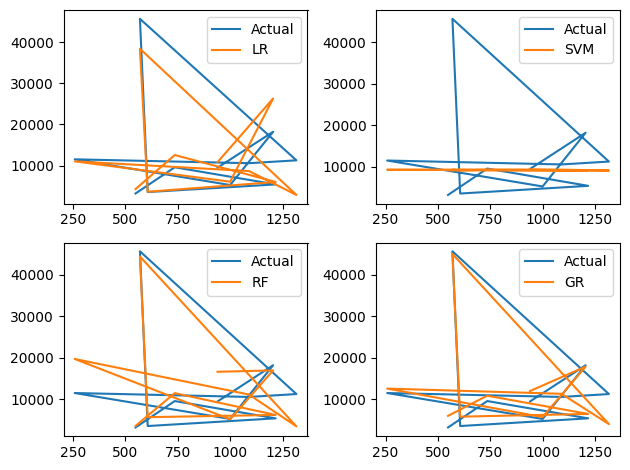

In [39]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['LR'].iloc[0:11], label='LR')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['SVM'].iloc[0:11], label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['RF'].iloc[0:11], label='RF')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['GR'].iloc[0:11], label='GR')
plt.legend()

plt.tight_layout()

### Evaluating the Algorithm

In [40]:
from sklearn import metrics

In [42]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [43]:
print(score1,score2,score3,score4)

0.7814888546122386 -0.10190954935843588 0.8277929010459217 0.8682995427778759


In [45]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

In [46]:
print(s1,s2,s3,s4)

3831.042665962354 7881.566447141361 2698.5144880697762 2374.6371664739813


### Predict Charges for New Customer

In [47]:
data = {'age':40,
       'sex':1,
       'bmi':40.3,
       'children':4,
       'smoker':1,
       'region':2}
df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [48]:
new_pred = gr.predict(df)
print(new_pred)

[42691.11172615]


### Saving the Model using joblib

In [49]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [50]:
import joblib

In [51]:
joblib.dump(gr, 'ins_model')

['ins_model']

In [52]:
model = joblib.load('ins_model')

In [53]:
model.predict(df)

array([42148.361888])

## End of the project